2

In [17]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [32]:
df = pd.read_csv('/content/RC/challenge_data.csv')

df['last_change_date'] = pd.to_datetime(df['last_change_date'])
df['year'] = df['last_change_date'].dt.year
df['month'] = df['last_change_date'].dt.month
df['day'] = df['last_change_date'].dt.day
df['year'] = df['year'].fillna(0)
df['month'] = df['month'].fillna(0)
df['day'] = df['day'].fillna(0)

y = df.impago
X = df.drop(['impago', 'id', 'last_change_date'], axis = 1)
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype('int64')

In [33]:
df.dtypes

id                                            object
num_cuentas_activas                            int64
num_cuentas_cerradas                           int64
max_credit                                   float64
mean_credit                                  float64
total_credit                                 float64
mean_balance                                 float64
total_balance                                float64
total_utilizacion                            float64
monto_en_mora                                float64
pagos_vencidos                                 int64
banco_count                                    int64
banco_limite                                   int64
banco_utilizacion                            float64
last_change_date                      datetime64[ns]
first_amount                                 float64
last_amount                                  float64
times_increased                                int64
max_increase                                  

In [34]:
#numerical columns pipeline
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='median'))])
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

prep = make_column_transformer((num_transformer, num_cols),
                               remainder= 'passthrough')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

mod = RandomForestClassifier()

pipe = Pipeline([('preprocessor', prep),
                ('model', mod)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['num_cuentas_activas', 'num_cuentas_cerradas', 'max_credit',
       'mean_credit', 'total_credit', 'mean_balance', 'total_balance',
       'total_utilizacion', 'monto_en_mora', 'pagos_vencidos', 'banco_co...
       'times_increased', 'max_increase', 'min_increase', 'dias_de_impagador',
       'facturacion_rappicard_mes_anterior', 'antiguedad_meses',
       'account_limit', 'pago_minimo_al_corte', 'pago_para_no_generar_interes',
       'total_pagos', 'total_gastos', 'porcentaje_uso_limite_de_cuenta',
       'porcentaje_compras_msi', 'porcentaje_compras_mci',
       'porcentaje_rubros_basicos', 'year', 'month', 'day'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [39]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [47]:
rf_model = pipe.named_steps['model']
importances = rf_model.feature_importances_
feature_names = X.columns
#indices = np.argsort(importances)[::-1]

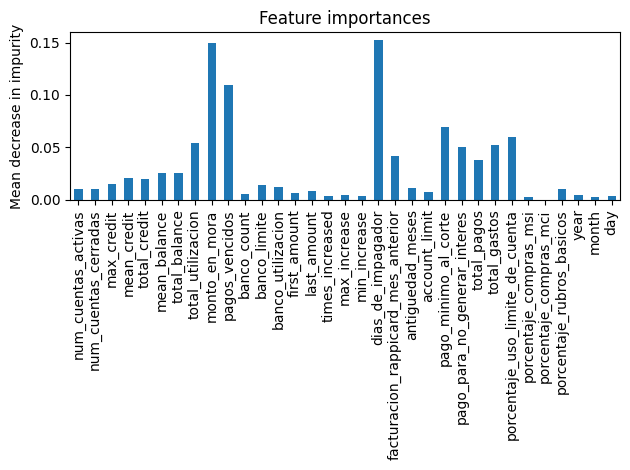

In [49]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()